In [73]:
import pandas as pd

Load the Dataset

In [74]:
df = pd.read_csv("advertising (1).csv")

In [75]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [77]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Cheking Null values in the Dataset

In [78]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

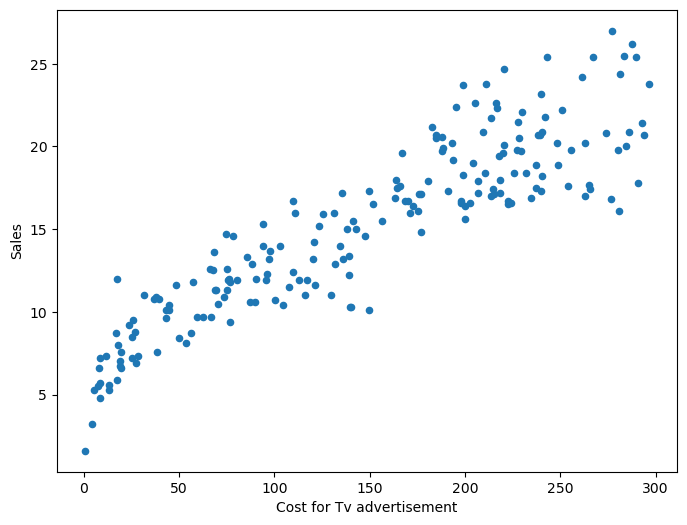

In [80]:
a = df.plot.scatter(x='TV',y='Sales',figsize=(8,6))
a.set_xlabel("Cost for Tv advertisement")
plt.show()

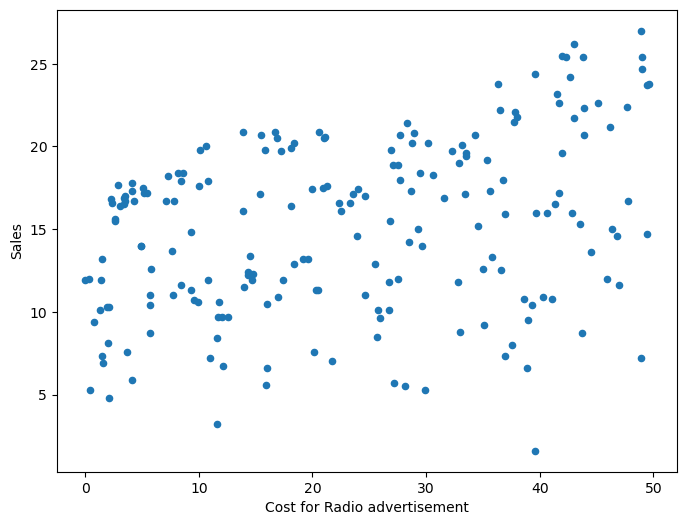

In [81]:
b = df.plot.scatter(x='Radio',y='Sales',figsize=(8,6))
b.set_xlabel("Cost for Radio advertisement")
plt.show()

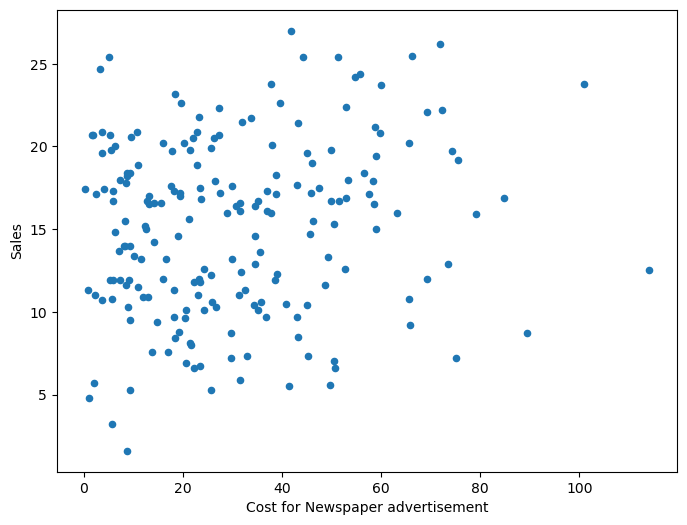

In [82]:
c = df.plot.scatter(x='Newspaper',y='Sales',figsize=(8,6))
c.set_xlabel("Cost for Newspaper advertisement")
plt.show()

Model Training

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [84]:
x = df.drop(columns='Sales',axis=1)
y = df['Sales']

In [85]:
print(x)
y

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [86]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)

In [87]:
model = LinearRegression()

In [112]:
y_train = y_train.astype('category')
y_test = y_test.astype('category')


In [89]:
model.fit(x_train, y_train)

LinearRegression()

In [90]:
pred = model.predict(x_test)
pred

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

In [93]:
from sklearn.metrics import r2_score

In [94]:
r2_score(pred, y_test)



0.8960265274962569

Use LogisticRegression Model For Training

In [99]:
from sklearn.svm import SVR

In [100]:
model = SVR()

In [101]:
model.fit(x_train,y_train)

SVR()

In [103]:
prediction = model.predict(x_test)
prediction

array([17.15330196, 19.49875585, 20.96245814,  8.60209215, 19.88553201,
       12.03803929, 19.98237498,  9.22752786, 17.73379117, 17.08961377,
        8.99691527,  9.3292374 , 18.62744348,  8.14145921, 14.08177689,
       16.00015525,  8.04682867, 17.97920438, 11.12951222, 19.55761255,
       20.0541767 , 12.95980908,  9.9170165 , 20.86239638, 10.43376345,
        9.07422216, 19.89744797, 14.71765498, 11.47650759,  8.24606316,
       16.91068571, 10.75656165, 19.72411632, 10.2142965 , 20.15216829,
       19.79413534, 10.88647539, 20.9688165 , 13.5160367 ,  7.85022468])

In [104]:
#check accuracy score of model
r2_score(y_test,prediction)

0.886764963148391